In [468]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [485]:
cases = pd.read_csv("https://raw.githubusercontent.com/COVID19Tracking/covid-tracking-data/master/data/states_daily_4pm_et.csv")

dates = cases['date'].unique()[::-1]
dates = [datetime.strptime(str(date), '%Y%m%d').strftime('%d-%b') for date in dates]
# reformat dates

# Convert narrow to wide table by positive test results
cases['idx'] = cases.groupby('state').cumcount()
cases = cases.pivot(index='state', columns='idx')[['positive']]
cases = cases[cases.columns[::-1]]

# use dates as columns
cases.columns = dates

# Use to get new cases instead of cumulative
def get_diff(row):
    return row.diff().fillna(row)
cases = cases.apply(get_diff, axis = 1)

# Use on new cases to get average over x days
def make_average(row):
    new_row = []
    row_list = row.tolist()
    for i, r in enumerate(row_list):
        if i < 10:
            new_row.append(r)
        else:
            new_row.append(mean(row_list[i - 9: i + 1]))
    return pd.Series(new_row)
cases = cases.apply(make_average, axis = 1)
cases.columns = dates
cases

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
4,20200618,AZ,43443.0,336289.0,NaN,1667.0,3956.0,540.0,NaN,341.0,...,379732,32,95,daaa2730525a7a7acc7d1498d3145f89c28d1ef1,0,0,0,0,0,NaN
60,20200617,AZ,40924.0,325269.0,NaN,1582.0,3861.0,531.0,NaN,346.0,...,366193,20,53,2d9a7c73f8c0689a91a349f295295a3fa887e169,0,0,0,0,0,NaN
116,20200616,AZ,39097.0,315237.0,NaN,1506.0,3808.0,502.0,NaN,340.0,...,354334,25,58,8dcc29a1345dc796f33bc350b18f954733a928be,0,0,0,0,0,NaN
172,20200615,AZ,36705.0,308552.0,NaN,1449.0,3750.0,464.0,NaN,307.0,...,345257,8,24,63be08bad71d36297e4a1aaeb41b67b953a669ad,0,0,0,0,0,NaN
228,20200614,AZ,35691.0,302354.0,NaN,1457.0,3726.0,452.0,NaN,317.0,...,338045,3,34,49ad7a0f959d01b5c2337b5247d51d80a96e4dd0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,20200308,AZ,5.0,44.0,7.0,NaN,NaN,NaN,NaN,NaN,...,49,0,0,b4eb5bcb5fa817131e647f1df7d1f9ba936949c2,0,0,0,0,0,NaN
5727,20200307,AZ,5.0,44.0,7.0,NaN,NaN,NaN,NaN,NaN,...,49,0,0,238fb805a65958ab450d785d4066f9307eda4742,0,0,0,0,0,NaN
5776,20200306,AZ,3.0,33.0,15.0,NaN,NaN,NaN,NaN,NaN,...,36,0,0,b60272e6fef615b0be42ad4623ba5b9c95c0c368,0,0,0,0,0,NaN
5810,20200305,AZ,2.0,28.0,6.0,NaN,NaN,NaN,NaN,NaN,...,30,0,0,2208da29f4d5982c56efb6a212028ccbbdfad978,0,0,0,0,0,NaN


In [470]:
populations = pd.read_csv("SCPRC-EST2019-18+POP-RES.csv")
codes = pd.read_csv("state_codes.csv")
regions = pd.read_csv("state_regions.csv")

# get regions and populations for states
populations = pd.merge(populations, codes, how='inner', left_on='NAME', right_on='State')
populations = pd.merge(populations, regions, how='inner', left_on='NAME', right_on='State')

populations = populations[["Code", "State_x", "Region", "POPESTIMATE2019"]]

populations

,Code,State_x,Region,POPESTIMATE2019
0,AL,Alabama,South,4903185
1,AK,Alaska,West,731545
2,AZ,Arizona,West,7278717
3,AR,Arkansas,South,3017804
4,CA,California,West,39512223
5,CO,Colorado,West,5758736
6,CT,Connecticut,Northeast,3565287
7,DE,Delaware,South,973764
8,FL,Florida,South,21477737
9,GA,Georgia,South,10617423


In [471]:
cases_with_pops = pd.merge(cases, populations, how='inner', left_on='state', right_on='Code')
cases_with_pops.iloc[:,:-4] = cases_with_pops.iloc[:,:-4].div(cases_with_pops.POPESTIMATE2019, axis=0)
cases_with_pops.iloc[:,:-4] = cases_with_pops.iloc[:,:-4].mul(100000)
cases_with_pops = cases_with_pops.fillna(0)
cases_with_pops

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,...,13-Jun,14-Jun,15-Jun,16-Jun,17-Jun,18-Jun,Code,State_x,Region,POPESTIMATE2019
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.036785,2.023115,1.913758,1.913758,2.077794,1.982106,AK,Alaska,West,731545
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.727071,13.344387,14.041893,14.009261,13.893010,14.849531,AL,Alabama,South,4903185
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.531564,14.692803,14.136107,13.552901,13.851131,13.877641,AR,Arkansas,South,3017804
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.795542,17.775111,16.998875,18.747810,19.282244,21.659037,AZ,Arizona,West,7278717
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.075279,7.351649,7.225865,6.971007,7.137791,7.536908,CA,California,West,39512223
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.532025,3.398315,3.073591,2.924253,2.767969,2.903415,CO,Colorado,West,5758736
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.337579,5.186118,4.978561,4.294184,4.097847,3.780902,CT,Connecticut,Northeast,3565287
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.309295,5.319564,5.822766,5.730341,5.155253,5.411989,DE,Delaware,South,973764
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.885269,7.163231,7.374147,8.078598,8.744404,9.787810,FL,Florida,South,21477737
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.447193,7.378438,7.339822,7.317218,7.659109,7.925652,GA,Georgia,South,10617423


In [472]:
cases_with_pops_temp = cases_with_pops
cases_with_pops_trans = cases_with_pops.T

cases_with_pops_trans.columns = cases_with_pops.State_x
cases_with_pops_trans.drop(cases_with_pops_trans.tail(4).index,inplace=True)

# Get ranks separately
cases_with_pops_trans = cases_with_pops_trans.fillna(0)
cases_ranks = cases_with_pops_trans.rank(axis=1, method='first', ascending=False)

# add five extra rows for each date
# To be used later in making the transitions smoother
cases_with_pops_trans = cases_with_pops_trans.reset_index()
cases_with_pops_trans.index = cases_with_pops_trans.index * 5
last_idx = cases_with_pops_trans.index[-1] + 1
cases_with_pops_trans = cases_with_pops_trans.reindex(range(last_idx))

# Do the same for ranks
cases_ranks = cases_ranks.reset_index()
cases_ranks.index = cases_ranks.index * 5
last_idx = cases_ranks.index[-1] + 1
cases_ranks = cases_ranks.reindex(range(last_idx))

cases_with_pops_trans['index'] = cases_with_pops_trans['index'].fillna(method='ffill')
cases_with_pops_trans = cases_with_pops_trans.set_index('index')

cases_ranks['index'] = cases_ranks['index'].fillna(method='ffill')
cases_ranks = cases_ranks.set_index('index')

# Add intermediate values for cases and ranks to show the bars passing each other
cases_with_pops_trans = cases_with_pops_trans.interpolate()
cases_ranks = cases_ranks.interpolate()

cases_with_pops_trans
cases_ranks

State_x,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Virginia,Vermont,Washington,Wisconsin,West Virginia,Wyoming
index,,,,,,,,,,,,,,,,,,,,,
22-Jan,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,42.0,43.0,44.0,45.0,46.0,47.0,1.0,48.0,49.0,50.0
22-Jan,1.8,2.8,3.8,4.8,5.8,6.8,7.8,8.8,9.8,10.8,...,41.8,42.8,43.8,44.8,45.8,46.8,10.2,48.0,49.0,50.0
22-Jan,1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,...,41.6,42.6,43.6,44.6,45.6,46.6,19.4,48.0,49.0,50.0
22-Jan,1.4,2.4,3.4,4.4,5.4,6.4,7.4,8.4,9.4,10.4,...,41.4,42.4,43.4,44.4,45.4,46.4,28.6,48.0,49.0,50.0
22-Jan,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,...,41.2,42.2,43.2,44.2,45.2,46.2,37.8,48.0,49.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17-Jun,44.2,2.0,3.0,1.0,16.8,40.8,29.0,23.6,9.6,14.2,...,18.8,11.0,14.4,7.8,20.0,48.2,30.0,25.0,47.0,39.0
17-Jun,44.4,2.0,3.0,1.0,16.6,40.6,30.0,23.2,9.2,14.4,...,18.6,11.0,13.8,7.6,20.0,48.4,30.0,25.0,47.0,39.0
17-Jun,44.6,2.0,3.0,1.0,16.4,40.4,31.0,22.8,8.8,14.6,...,18.4,11.0,13.2,7.4,20.0,48.6,30.0,25.0,47.0,39.0


18-Jun


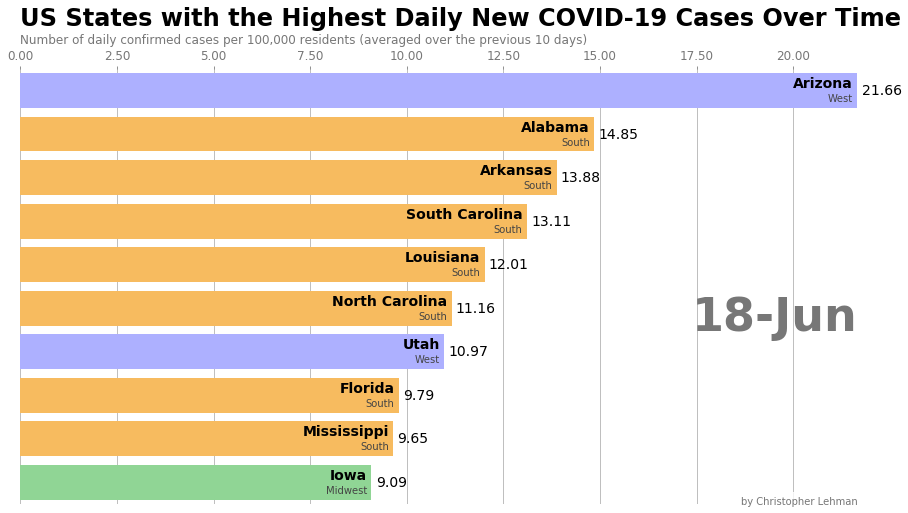

In [473]:
fig, ax = plt.subplots(figsize=(15, 8))
chartBox = ax.get_position() 

# Color the bars by region
colors = dict(zip(
    ['West', 'South', 'Midwest', 'Northeast'],
    ['#adb0ff', '#f7bb5f', '#90d595', '#e48381']
))
group_lk = cases_with_pops_temp.set_index('State_x')['Region'].to_dict()

cases_with_pops = cases_with_pops_trans.T
cases_ranks_final = cases_ranks.T

def draw_barchart(date):
    # This will get the dataframe of all five columns with that date
    cases_by_day = cases_with_pops[date.split('.')[0]]
    cases_ranks_by_day = cases_ranks_final[date.split('.')[0]]
    
    cases_by_day = pd.DataFrame(cases_by_day)
    cases_ranks_by_day = pd.DataFrame(cases_ranks_by_day)
    
    # Split the columns by name
    cases_by_day.columns = pd.io.parsers.ParserBase({'names':cases_by_day.columns})._maybe_dedup_names(cases_by_day.columns)
    cases_ranks_by_day.columns = pd.io.parsers.ParserBase({'names':cases_ranks_by_day.columns})._maybe_dedup_names(cases_ranks_by_day.columns)

    # Get the top 10 for plotting
    most_cases = cases_by_day.sort_values(by=date).tail(10)
    most_cases = most_cases[most_cases[date] != 0]
    
    most_case_ranks = cases_ranks_by_day.sort_values(by=date, ascending=False).tail(10)
#     print(most_case_ranks)
    print(date)
    ax.clear()
    # Plot Y values as the rank
    ax.barh([10 - val for val in most_case_ranks[date]], most_cases[date], color=[colors[group_lk[x]] for x in most_cases.index])
    dx = most_cases[date].max() / 200
    for i, (value, state) in zip(most_case_ranks[date], (zip(most_cases[date], most_cases.index))):
        # State label
        ax.text(value-dx, 10 - i,     state,           size=14, weight=600, ha='right', va='bottom')
        # Region label
        ax.text(value-dx, 10 - (i+.25), group_lk[state], size=10, color='#444444', ha='right', va='baseline')
        # Cases label
        ax.text(value+dx, 10 - i,     f'{value:,.2f}',  size=14, ha='left',  va='center')
    # ... polished styles
    # Date annotation
    ax.text(1, 0.4, date.split('.')[0], transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Number of daily confirmed cases per 100,000 residents (averaged over the previous 10 days)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.1, 'US States with the Highest Daily New COVID-19 Cases Over Time',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Christopher Lehman', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    # adjust slightly downward
    ax.set_position([chartBox.x0, chartBox.y0 - .05, 
                     chartBox.width, 
                     chartBox.height]) 
    plt.box(False)
draw_barchart("18-Jun")

18-Jun
18-Jun
18-Jun


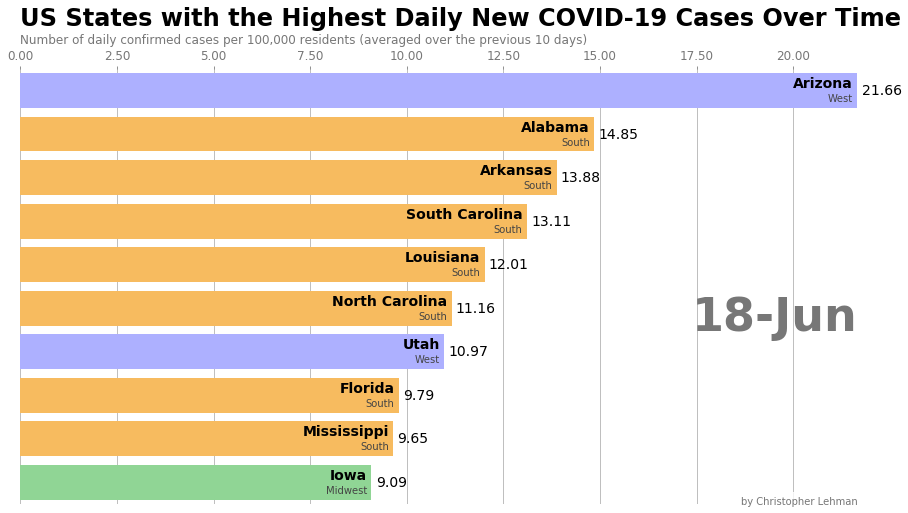

In [479]:
start_date = datetime.strptime("20200313", '%Y%m%d')
cur_date = start_date
date_list = []

# Prepare dates to loop through with start date to today
while cur_date.date() != datetime.today().date():
    date_list.append(cur_date.strftime('%d-%b'))
    # Add five dates for each one except today
    date_list.extend([cur_date.strftime('%d-%b') + '.' + str(i + 1) for i in range(4)])
    cur_date = cur_date + timedelta(days=1)
    
# Add today
date_list.append(datetime.today().strftime('%d-%b'))
# print(date_list)
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=date_list)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=5)
animator.save('covid_bar_race.mp4', writer=writer) 